**Steps Involved**
1. Importing the Data

2. Cleaning or Preparing the Data
- Input & Output sets

3. Splitting the Data into Training/Test Sets (80/20)
- train/test (20/80)

4. Creating a Model (Learning & Predicting)

5. Training the Model
- Model Persistence

6. Making Predictions
- Visualizing Decision Trees

7. Evaluating & Improving

In [45]:
import pandas as pd
music_data = pd.read_csv('/content/music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [46]:
X = music_data.drop(columns=['genre']) # Input Set
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [47]:
y = music_data['genre'] # Output Set
y

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz
5,Jazz
6,Classical
7,Classical
8,Classical
9,Dance


In [48]:
from sklearn.tree import DecisionTreeClassifier
# Male = 1, Female = 0
model = DecisionTreeClassifier()
model.fit(X, y)
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [49]:
predictions = model.predict([ [21, 1], [22, 0] ])
predictions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# input (train & test), output (train & test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

model = DecisionTreeClassifier()
model.fit(X_train, y_train) # Input & Output
predictions = model.predict(X_test) # Input

score = accuracy_score(y_test, predictions)
score

0.2

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# input (train & test), output (train & test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train) # Input & Output
predictions = model.predict(X_test) # Input

score = accuracy_score(y_test, predictions)
score

1.0

In [52]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming music_data is defined in a previous cell
music_data = pd.read_csv('/content/music.csv')
X = music_data.drop(columns=['genre']) # Input Set
y = music_data['genre'] # Output Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.fit(X, y)

joblib.dump(model, 'music-recommender.joblib') # Binary File


['music-recommender.joblib']

In [53]:
model = joblib.load('music-recommender.joblib')
predictions = model.predict([[21, 1]])
predictions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

In [54]:
from sklearn import tree

tree.export_graphviz(model, out_file='music-recommender.dot',
                     feature_names=['age', 'gender'], # So that we can see the rules in our nodes
                     class_names=sorted(y.unique()), # Class names are set to the unique list of genres, & that's for displaying the class for each node/box
                     label='all', # So that every node has labels that we can read
                     rounded=True, # Boxes have Rounded Corners
                     filled=True) # each box/node is filled with a color

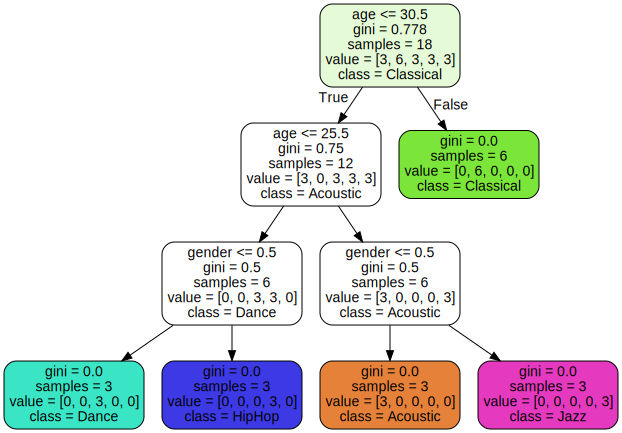

In [55]:
import graphviz

# Read the .dot file
with open('music-recommender.dot') as f:
    dot_graph = f.read()

# Display the graph
graphviz.Source(dot_graph)